# 遗传算法

## 介绍
遗传算法模拟生物在环境中的优胜劣汰，适者生存法则。  
假想存在一个种族，他们不断繁衍后代，在繁衍过程中会出现随机的变异（更适合环境，更不适合环境）。适应环境的人会被保留并且继续繁衍后代，不适应环境的则会被淘汰，最后不断循环这一个过程，得到一个近似的最优。就是我们遗传算法思想的开端。

## 主要机制
### 选择(Selection)
从总的人口中选取适应度高的人，以取代适应度低的人。
### 交叉(Crossover)
选取两个DNA，生成一个新的DNA的交叉过程。
### 变异(Mutation)
个体在交叉完之后，每一个DNA位置都有可能产生变异的可能性。

## 编码与解码
### 实数编码
直接用实数表示基因，容易理解且不需要解码过程，但容易过早收敛，从而陷入局部最优
### 二进制编码
二进制编码：稳定性高，种群多样性大，但需要的存储空间大，需要解码且难以理解

## 一个算例（计算曲线的最高点）

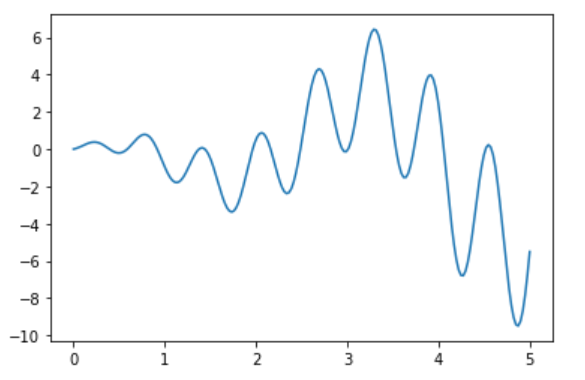

初始设定：  
1.每个人的DNA一共有10个特征值，分别用0和1来表示。   
　　例如[1000010000]表示一个人的特征    
2.种群总数为100。  
3.每次匹配的概率，匹配成功时，与其他人的DNA进行随机的混合。  
4.基因存在变异率（10个基因每个都会有里面会有一定概率从1变成0，或者从0变成1）  
5.设定fitness，越适应环境越大概率被留下   
6.设定繁衍后代次数，完毕后结束。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DNA_SIZE = 10     #设定DNA长度      
POP_SIZE = 100     #设定种群大小     
CROSS_RATE = 0.8      #设定匹配可能性大小   
MUTATION_RATE = 0.003    #基因变异的可能性大小
N_GENERATIONS = 200      #繁衍总次数  
X_BOUND = [0, 5]         #x的上下限

In [3]:
#设定目标函数
#目标：寻找全局最大
def F(x): 
    return np.sin(10 * x) * x + np.cos( 2 * x) * x 

In [4]:
#适应性函数（在曲线中的高度）
def get_fitness(pred): 
    return pred + 1e-3 - np.min(pred)

In [5]:
#2进制与10进制转化，从【1000100010】到【0-5】
def translateDNA(pop): 
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

In [6]:
#选择留下来的人,
def select(pop, fitness):    
    index = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,p=fitness/fitness.sum())
    return pop[index]

In [7]:
#父母DNA结合过程
def crossover(parent, pop):     
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                            
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)  
        parent[cross_points] = pop[i_, cross_points]       
    return parent

In [8]:
#繁衍变异过程
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

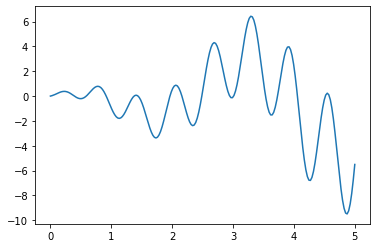

In [9]:
#随机生成100*10的种群
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   

# 把0-5平均分成200段，与对应的fx画图
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))

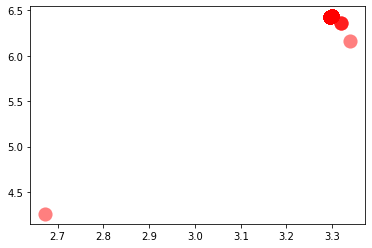

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


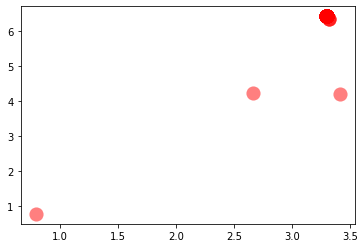

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


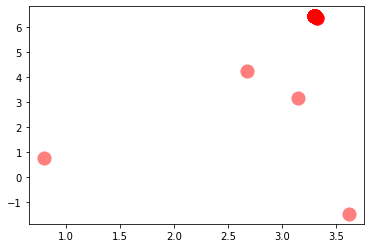

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


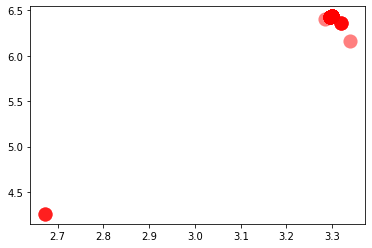

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


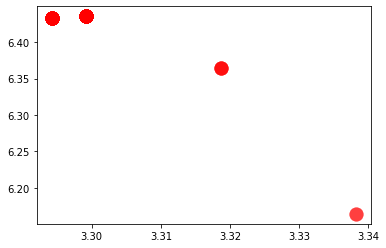

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


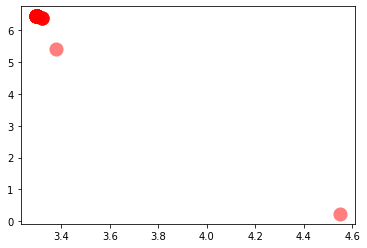

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


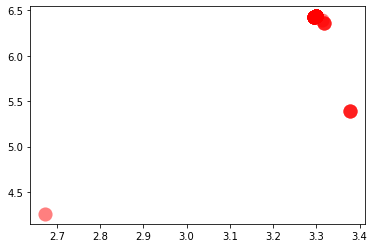

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


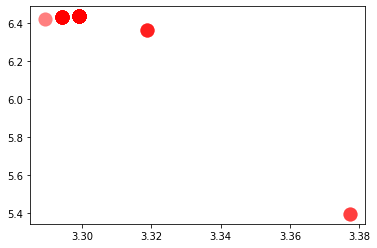

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


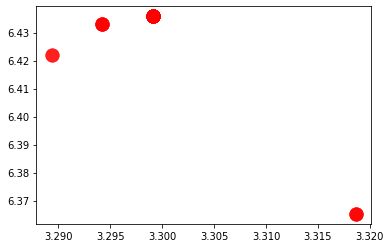

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


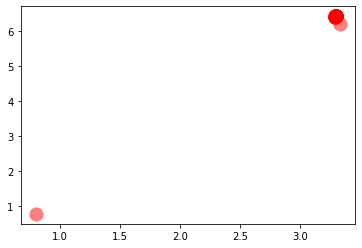

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


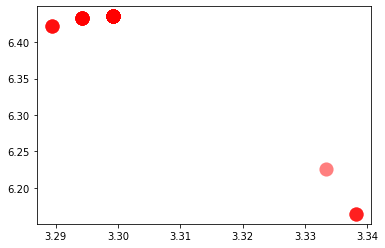

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


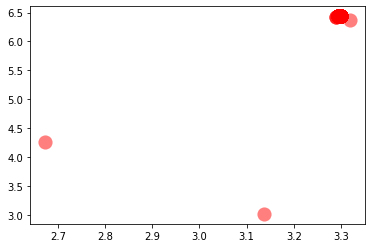

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


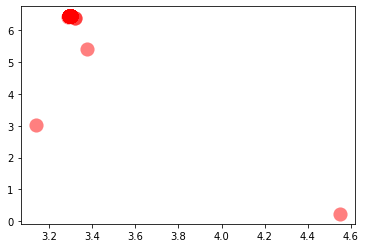

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


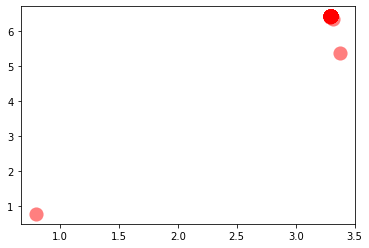

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


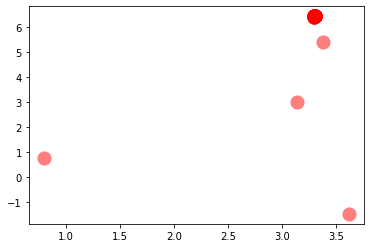

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


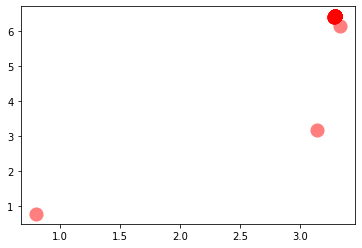

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


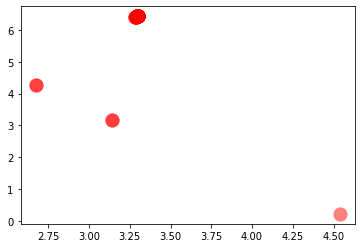

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


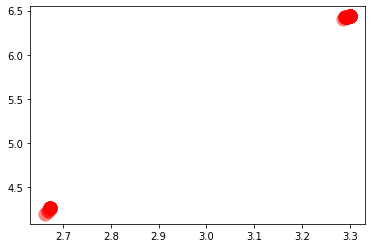

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


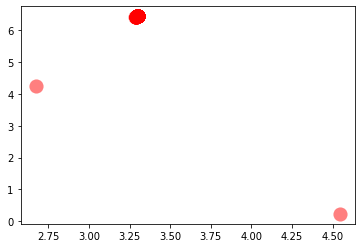

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


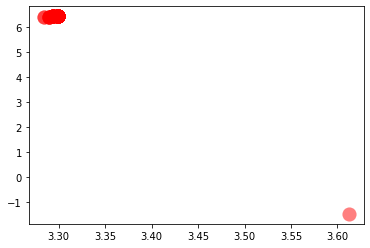

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


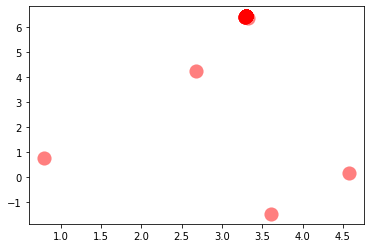

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


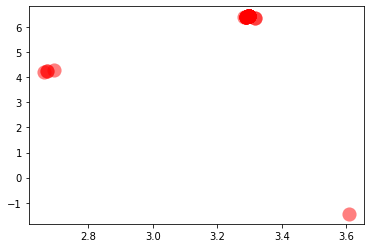

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


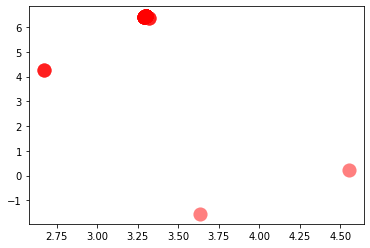

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


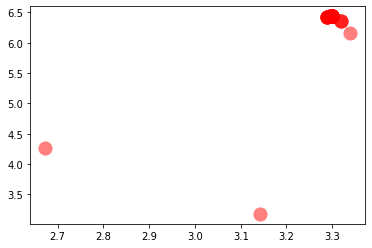

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


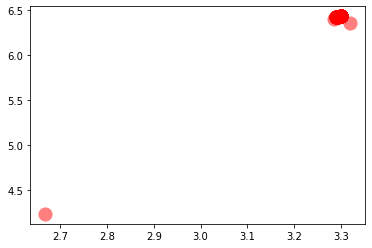

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


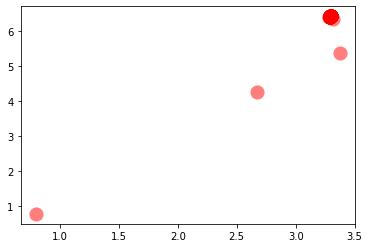

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


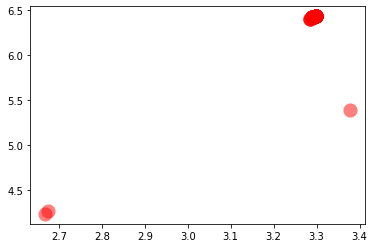

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


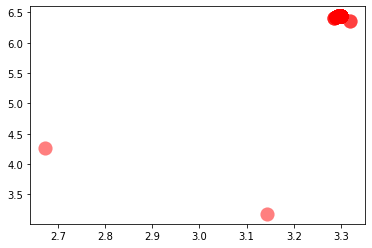

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


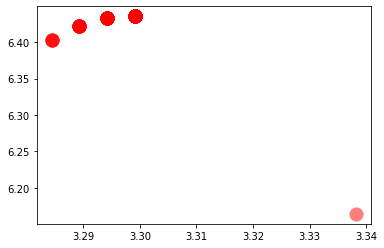

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


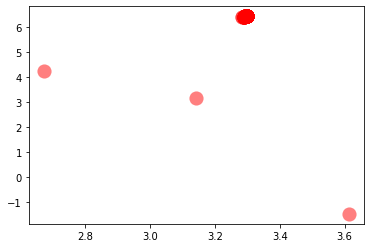

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


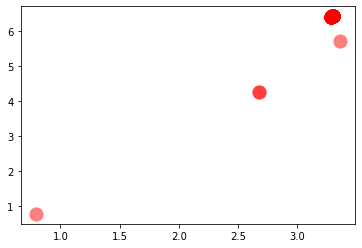

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


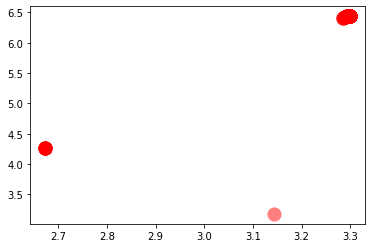

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


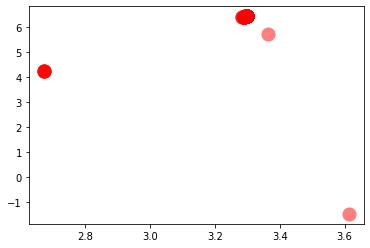

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


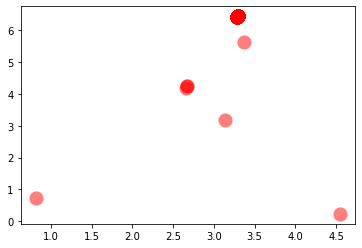

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


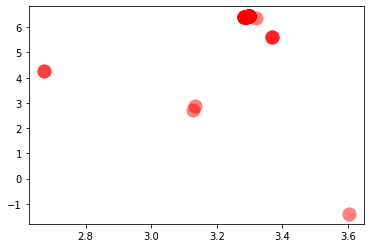

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


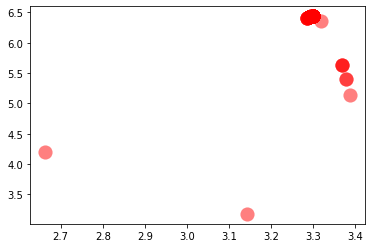

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


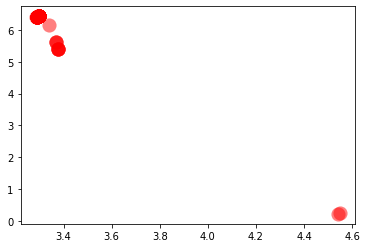

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


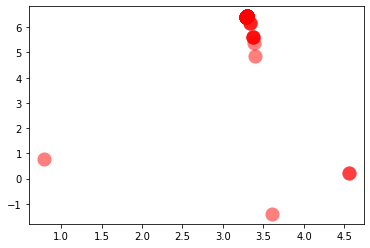

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


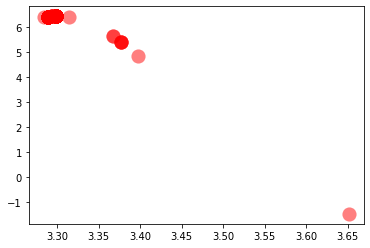

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


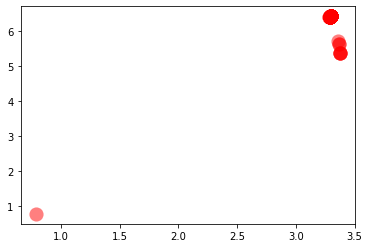

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


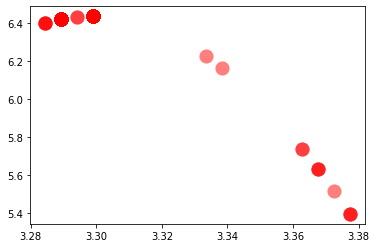

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


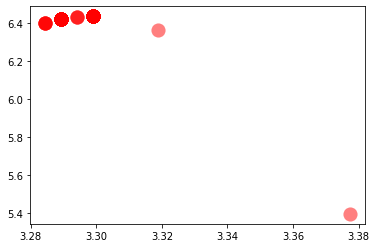

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


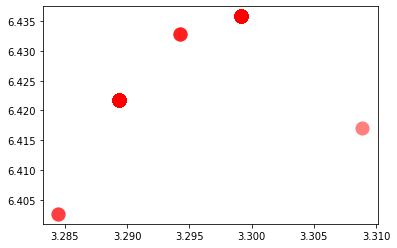

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


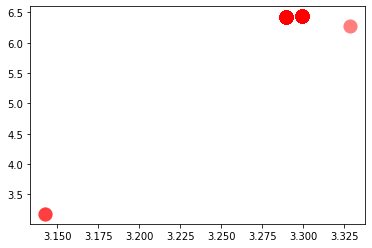

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


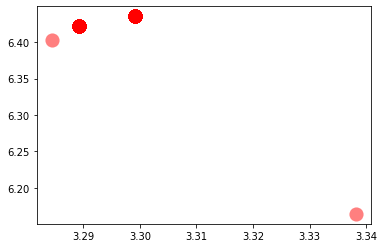

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


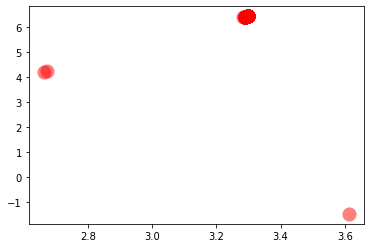

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


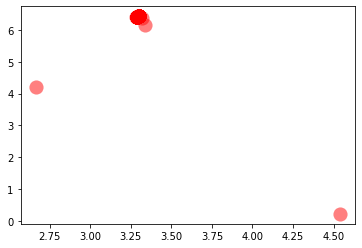

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


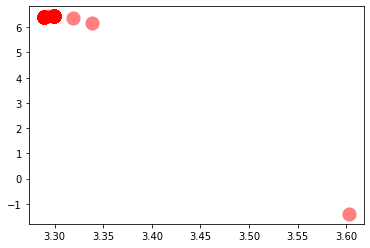

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


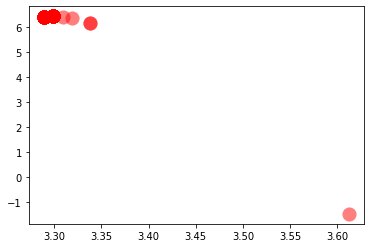

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


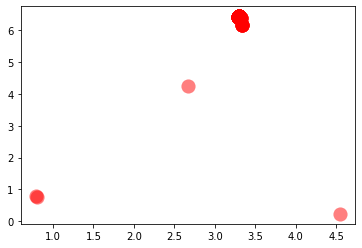

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


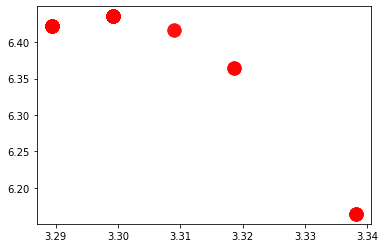

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


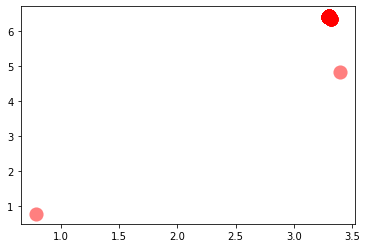

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


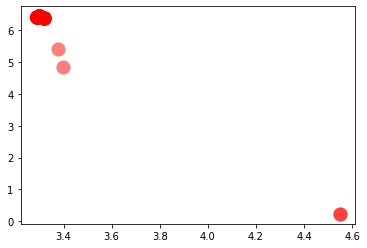

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


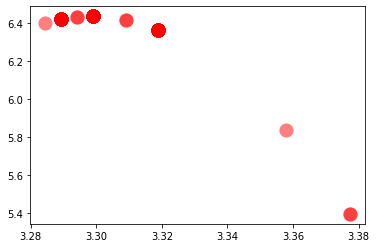

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


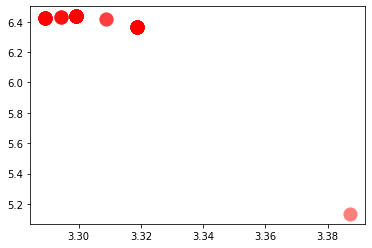

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


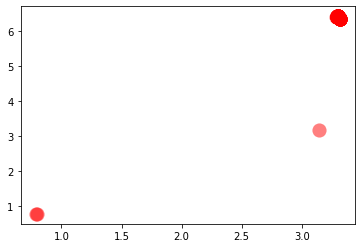

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


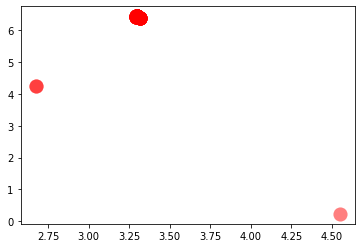

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


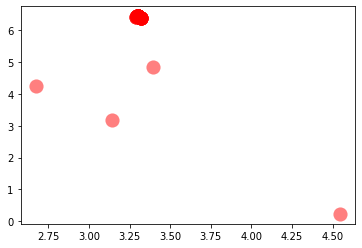

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


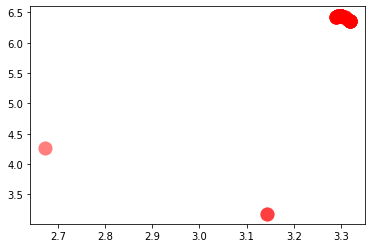

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


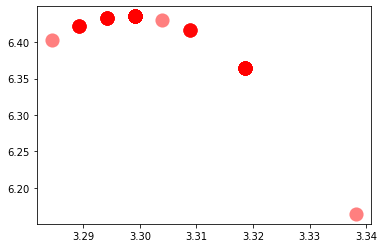

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


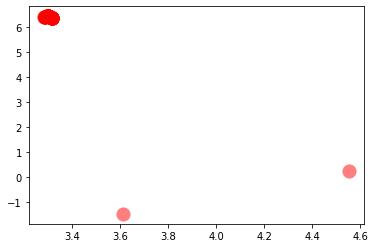

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


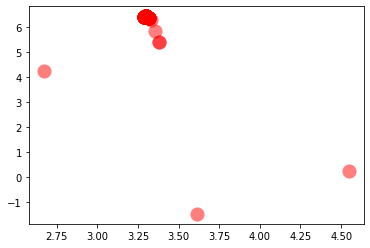

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


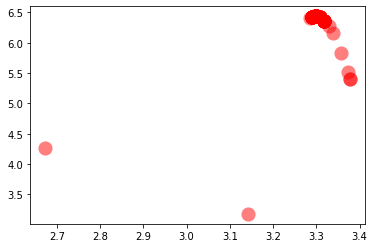

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


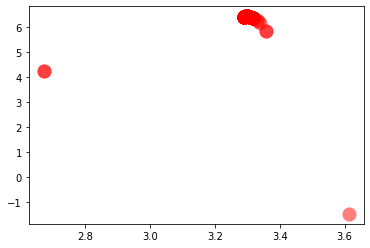

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


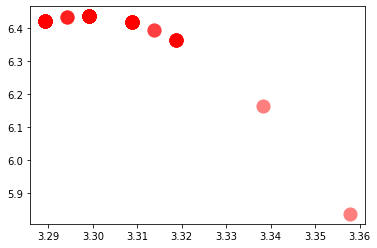

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


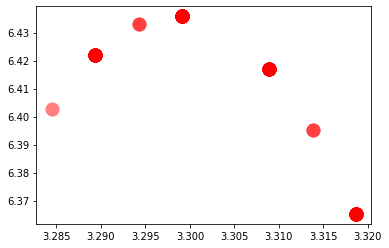

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


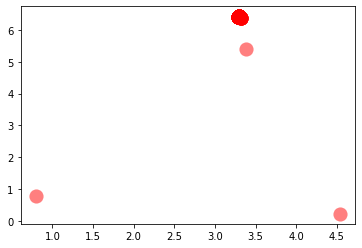

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


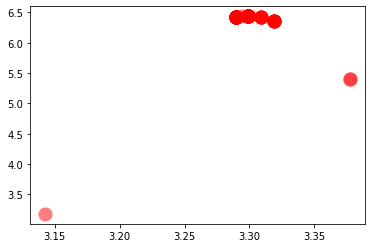

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


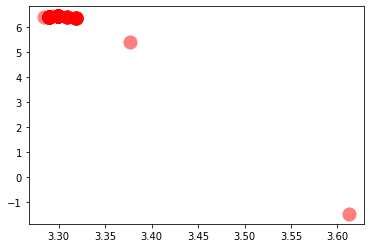

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


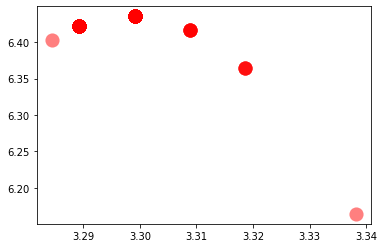

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


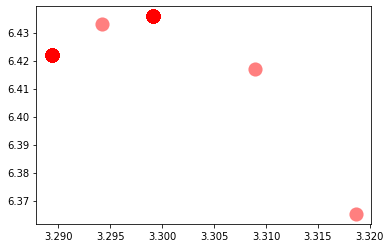

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


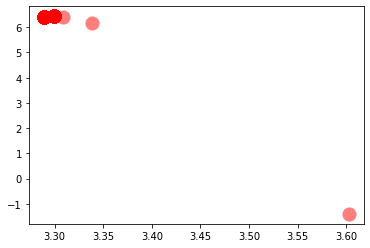

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


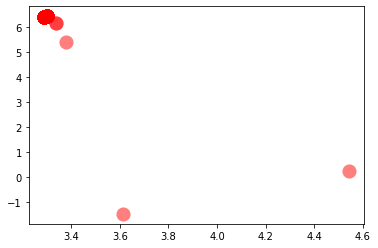

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


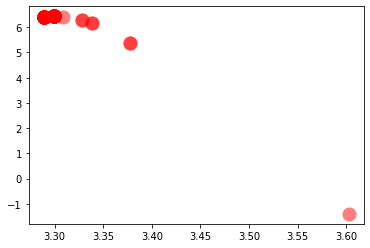

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


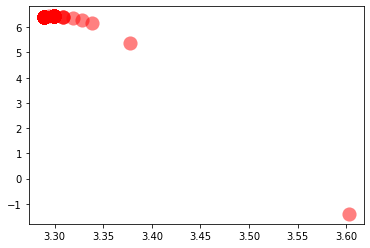

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


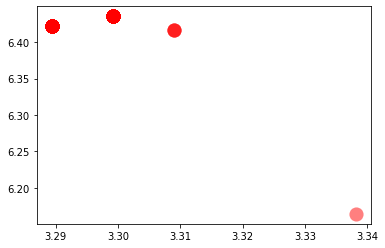

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


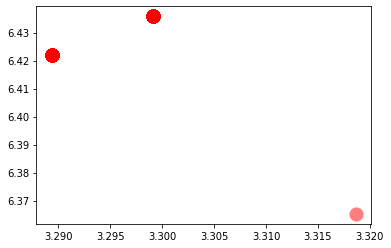

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


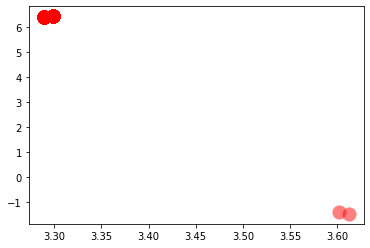

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


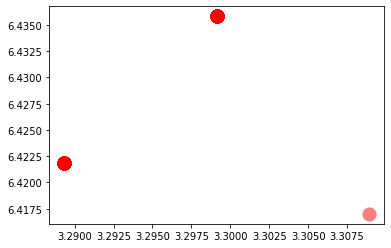

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


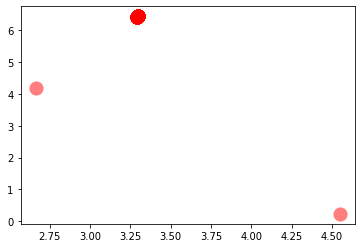

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


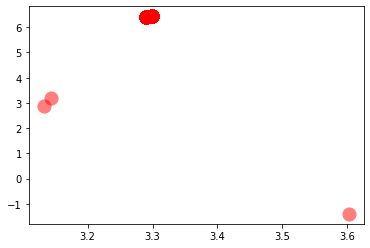

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


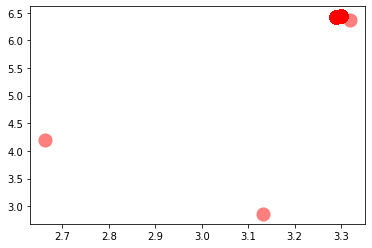

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


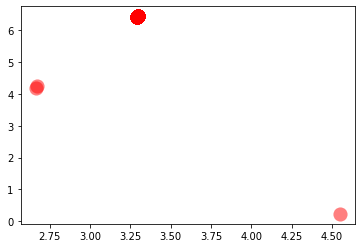

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


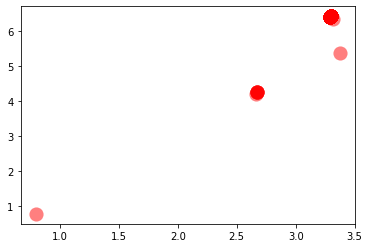

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


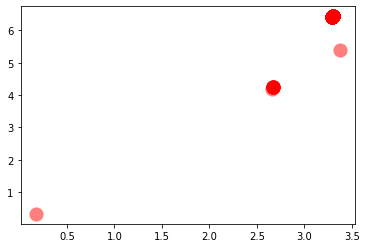

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


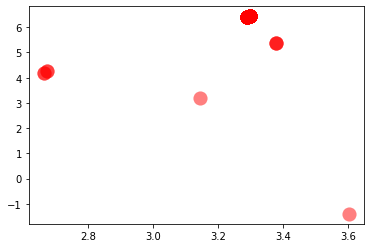

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


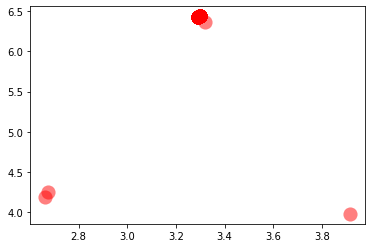

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


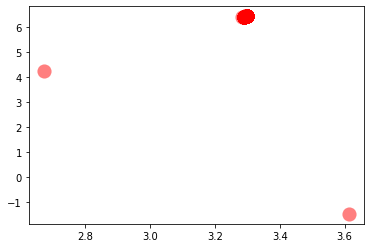

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


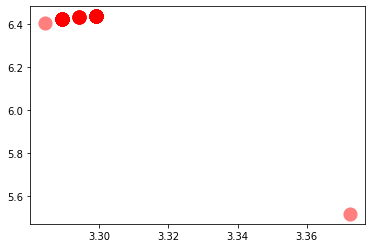

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


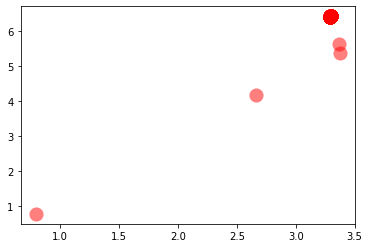

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


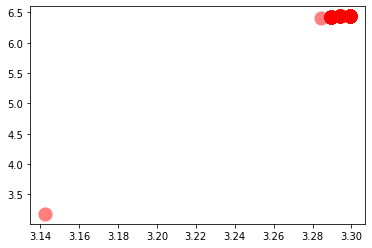

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


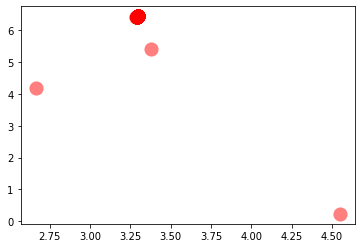

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


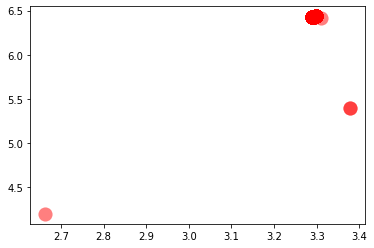

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


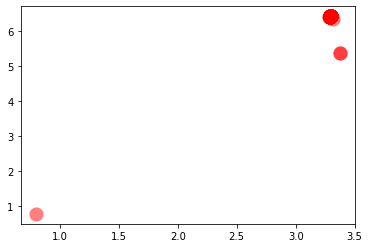

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


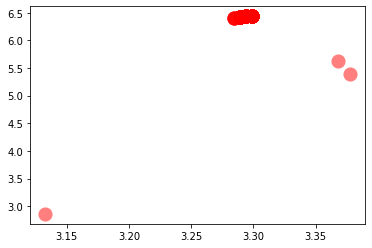

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


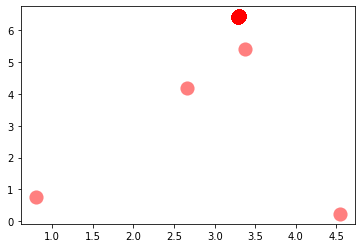

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


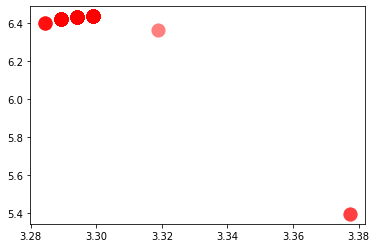

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


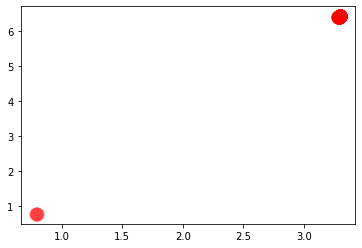

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


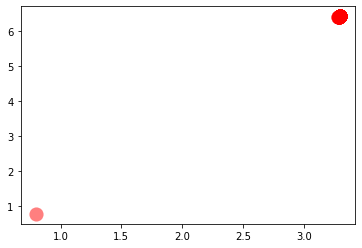

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


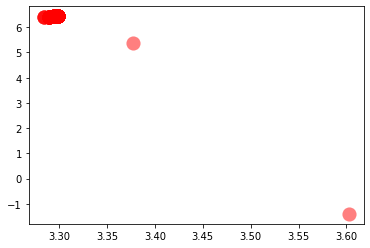

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


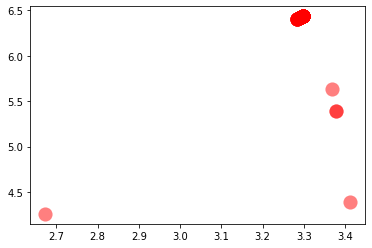

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


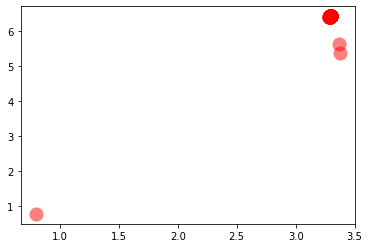

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


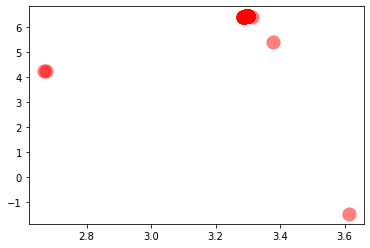

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


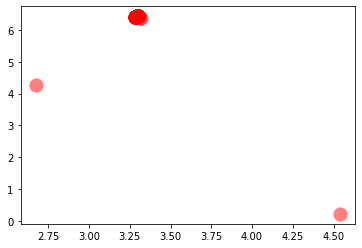

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


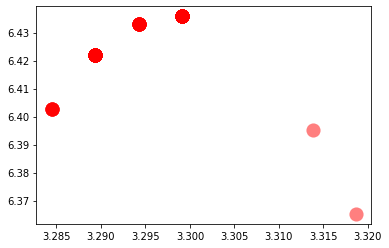

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


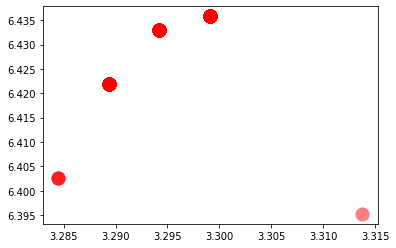

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


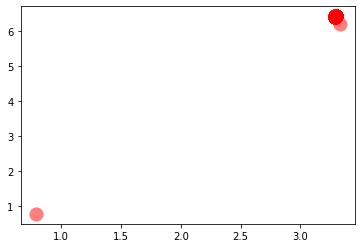

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


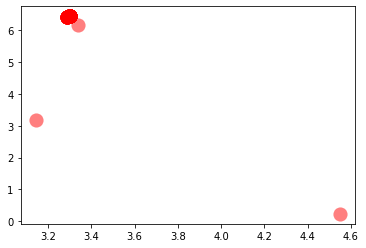

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


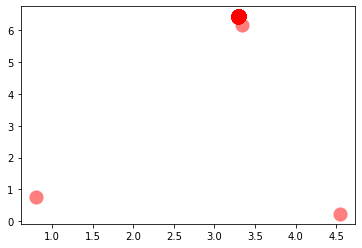

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


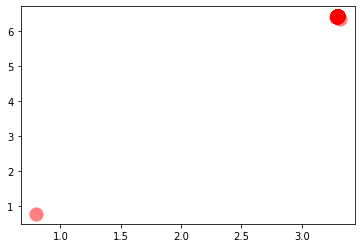

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


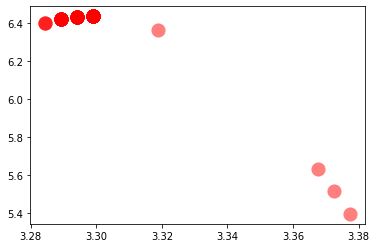

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


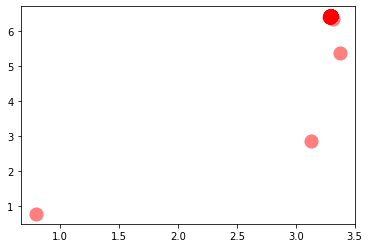

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


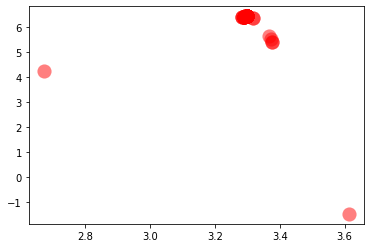

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


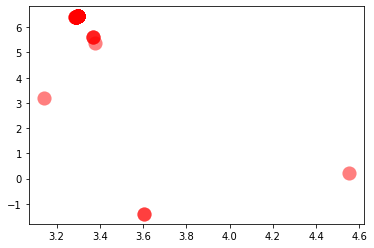

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


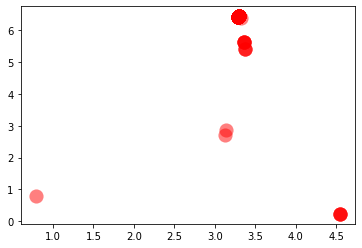

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


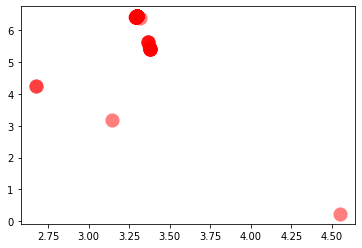

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


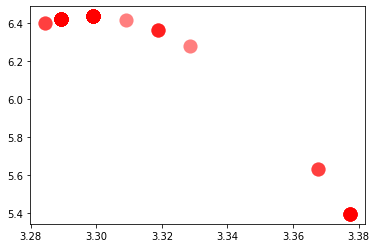

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


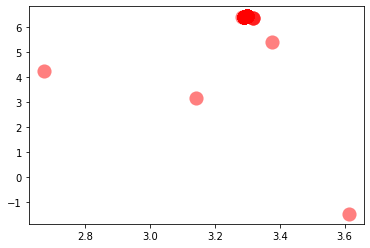

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


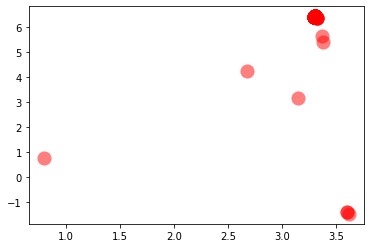

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


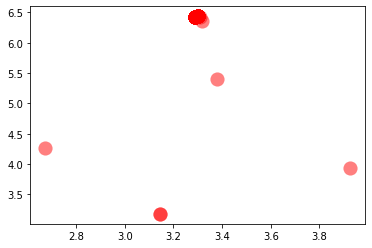

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


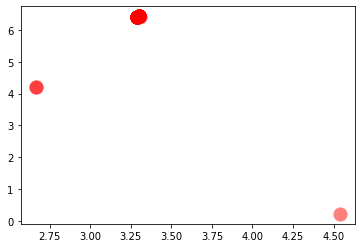

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


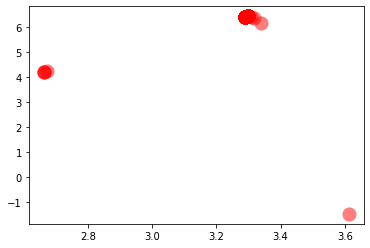

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


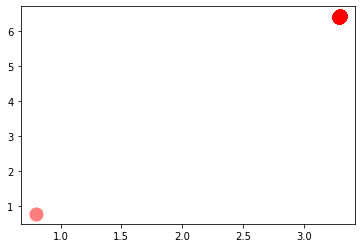

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


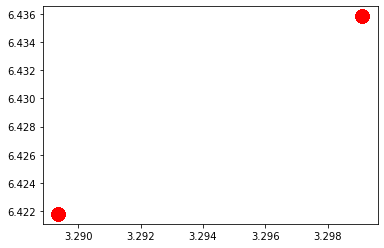

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


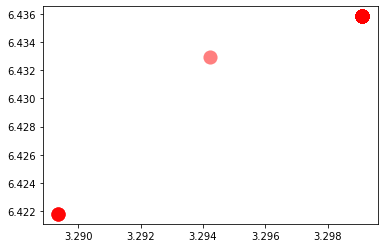

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


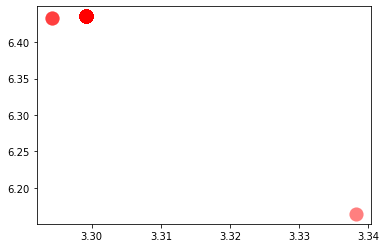

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


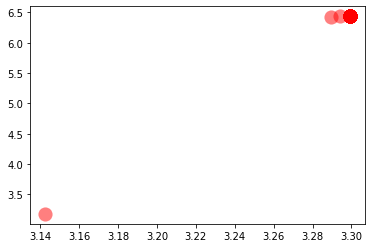

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


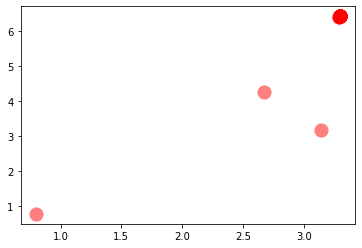

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


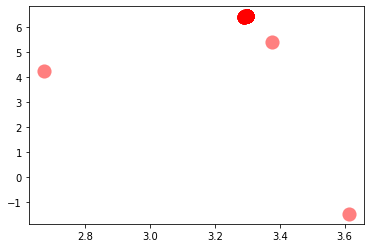

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


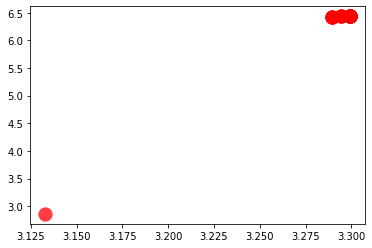

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


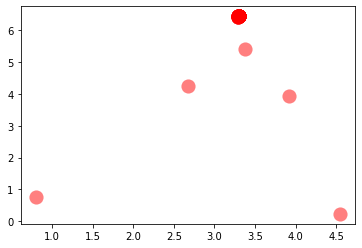

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


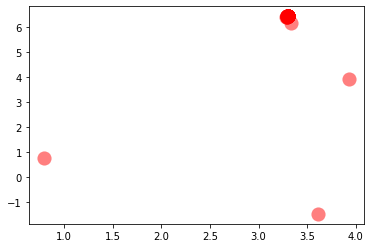

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


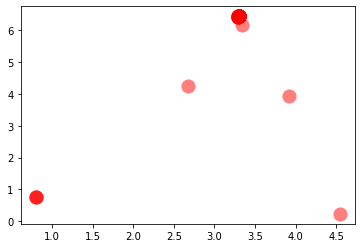

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


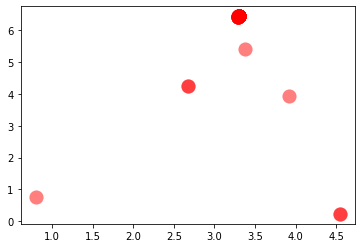

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


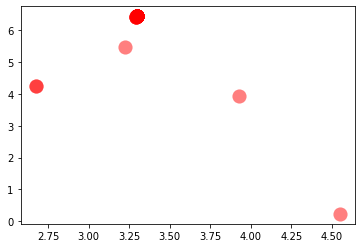

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


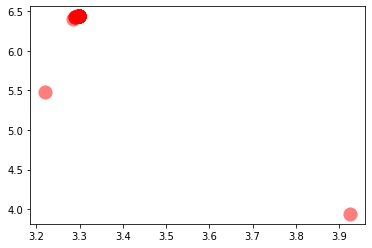

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


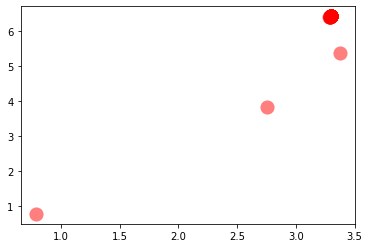

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


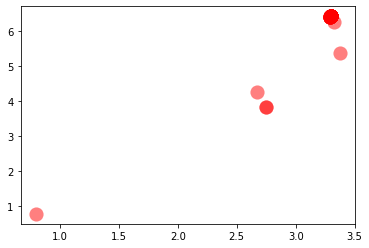

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


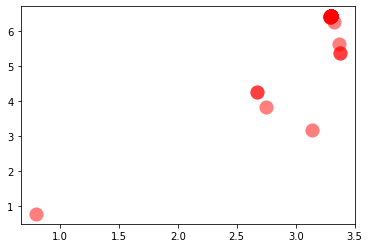

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


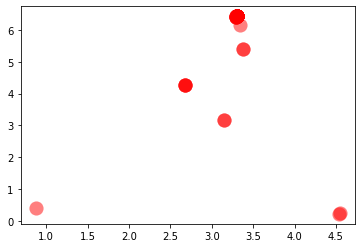

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


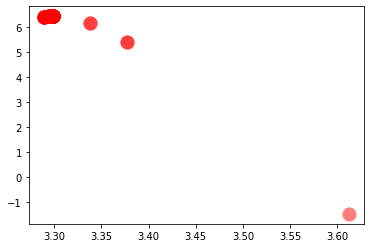

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


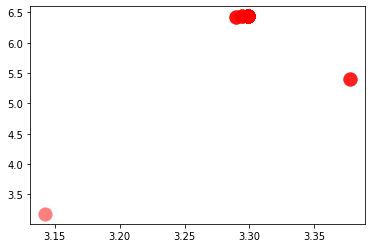

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


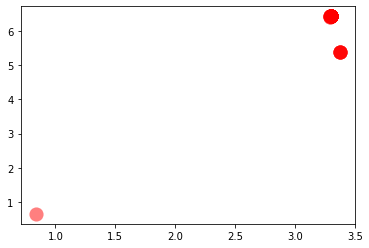

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


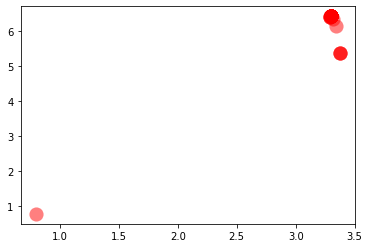

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


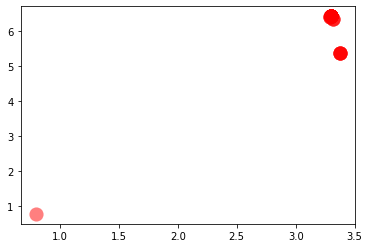

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


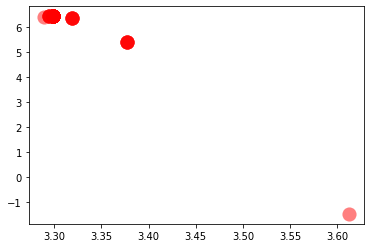

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


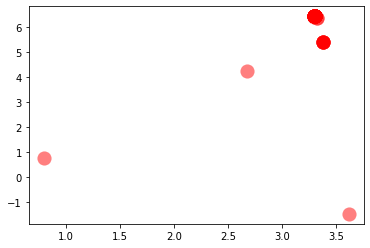

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


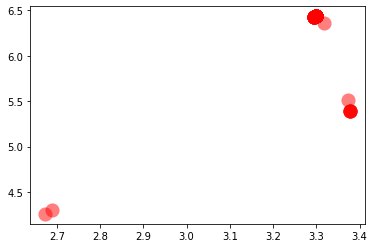

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


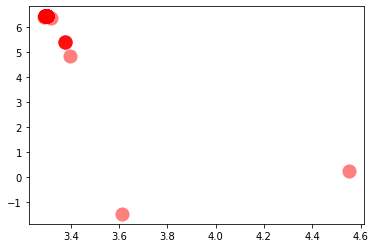

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


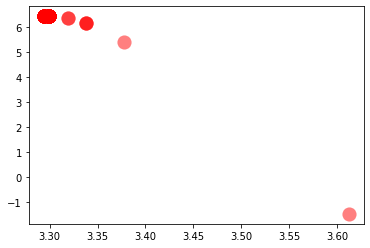

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


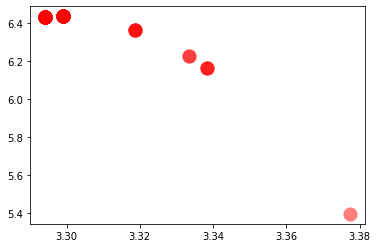

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


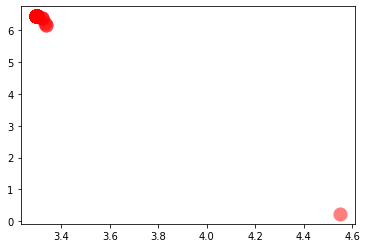

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


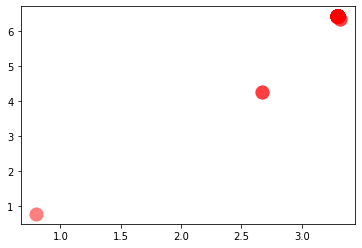

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


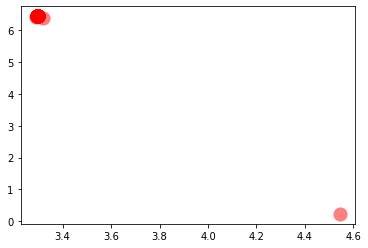

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


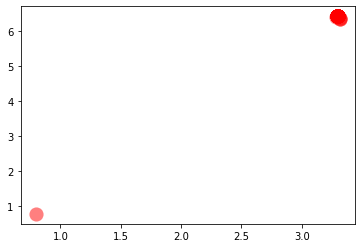

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


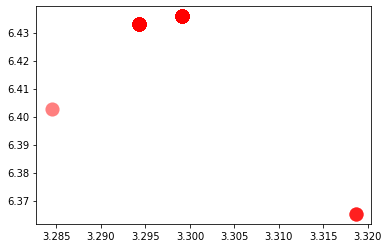

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


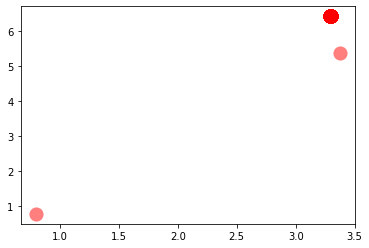

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


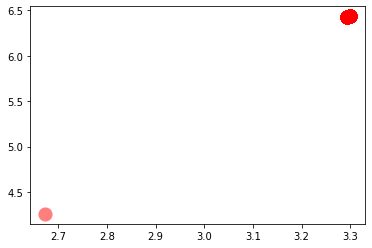

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


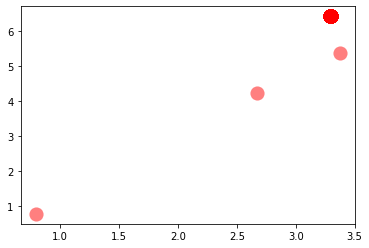

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


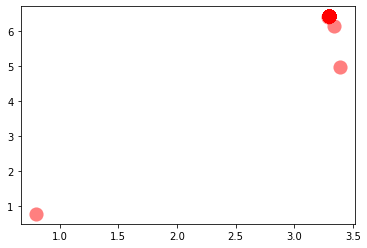

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


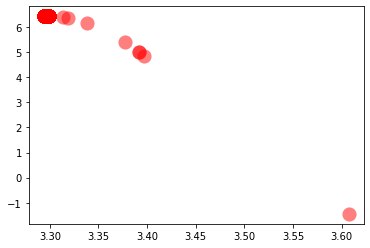

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


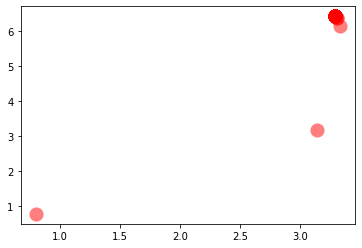

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


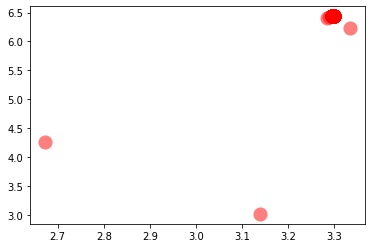

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


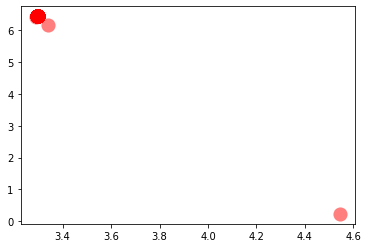

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


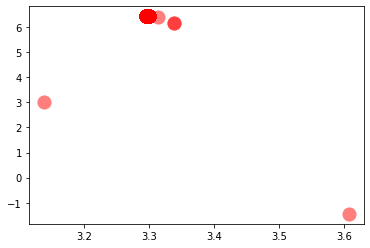

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


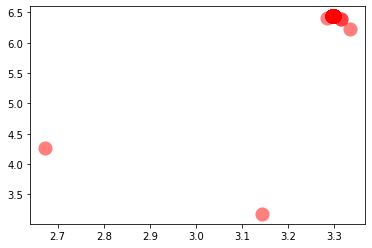

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


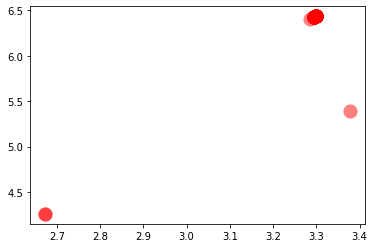

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


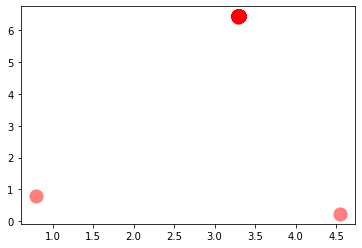

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


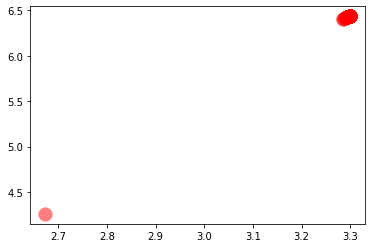

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


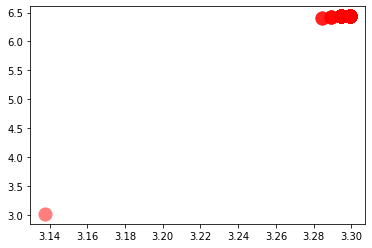

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


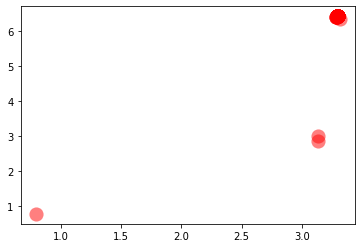

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


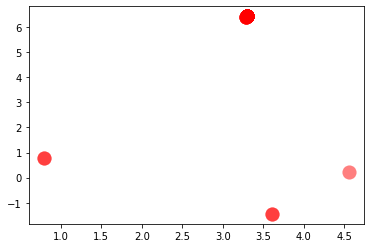

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


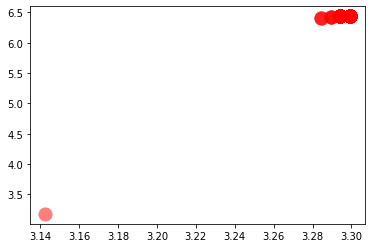

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


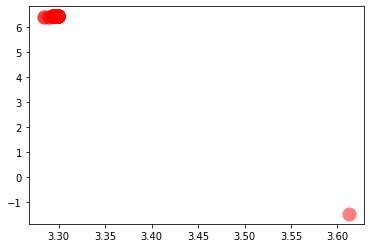

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


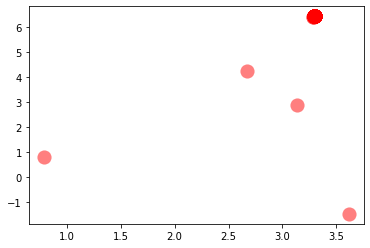

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


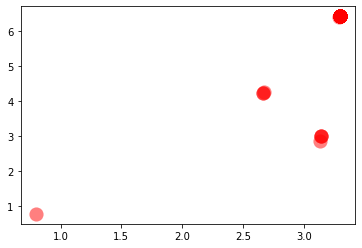

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


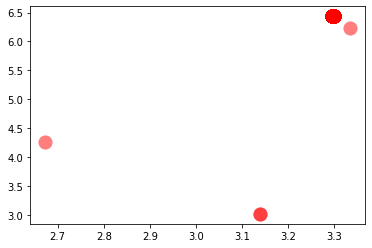

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


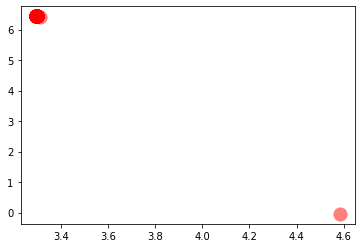

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


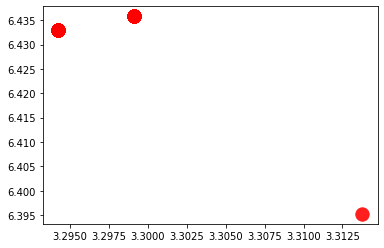

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


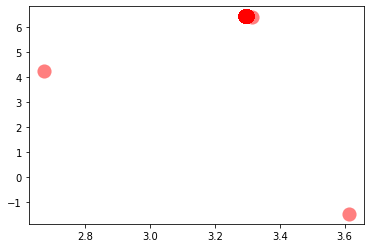

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


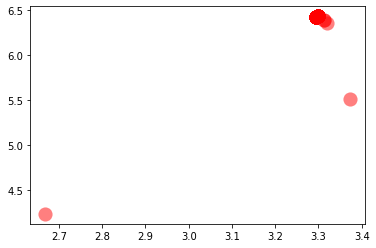

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


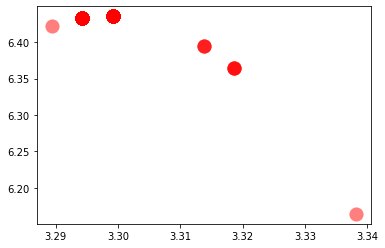

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


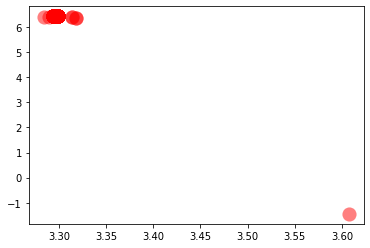

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


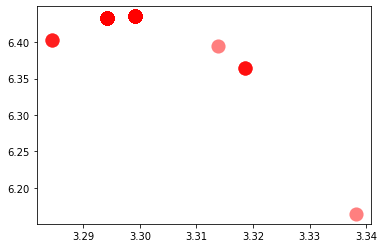

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


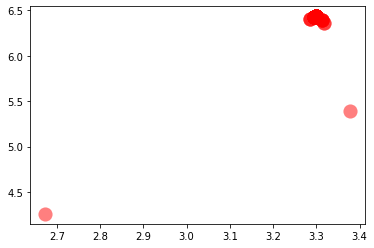

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


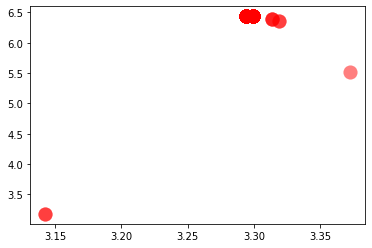

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


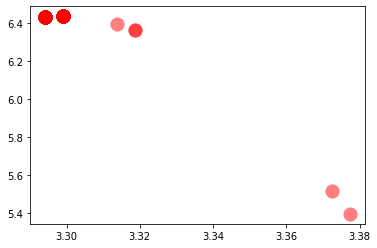

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


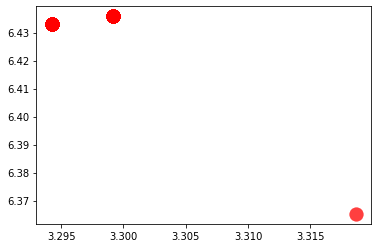

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


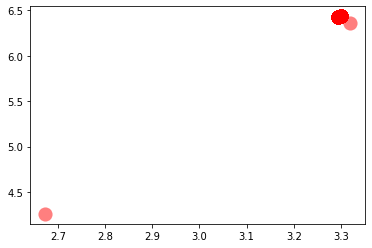

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


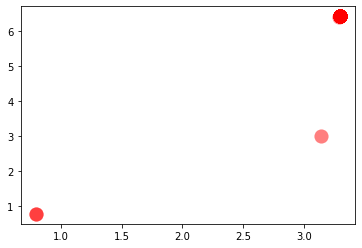

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


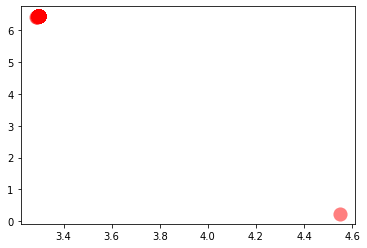

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


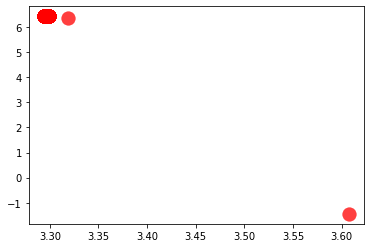

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


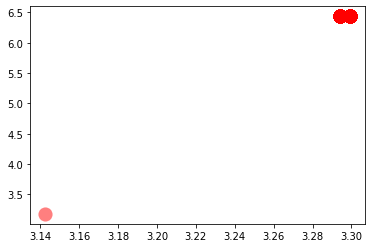

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


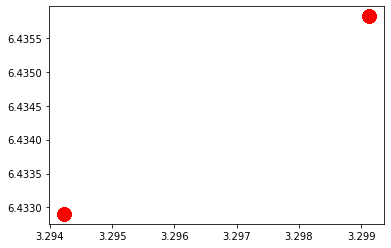

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


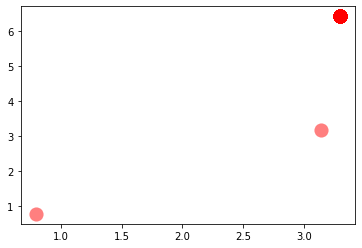

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


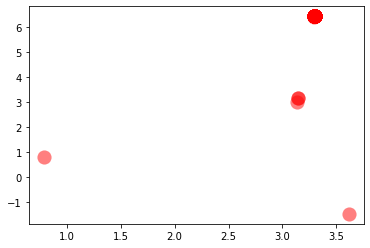

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


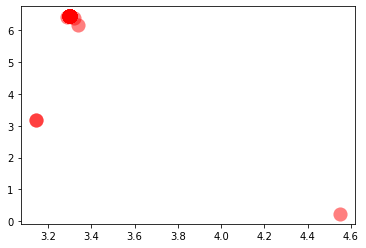

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


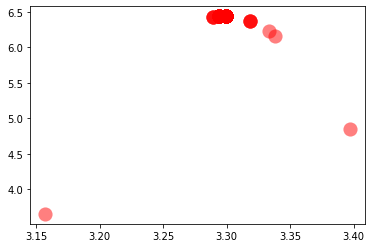

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


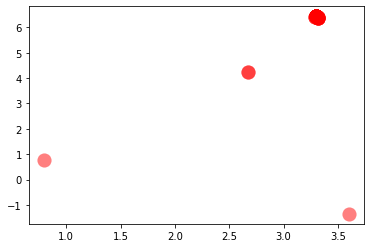

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


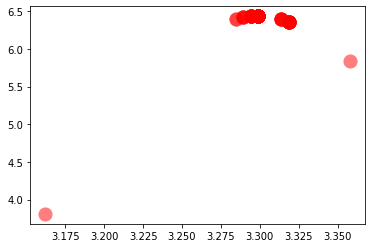

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


In [17]:
for _ in range(N_GENERATIONS):
    
    F_values = F(translateDNA(pop))    
    
    #画图
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # 遗传进化部分
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       #下一代替换
